In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [4]:
16468-14951

1517

### 4046,4225,4770 have standard deviations larger than mean, might have very large skewness.

In [5]:
data=data[0:1517]

In [6]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [7]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### As the problem statement suggests one can take either the "Avarage Price" as target variable or the region as target variable. We shall begin with avg price as target variable.

In [8]:
data.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,NaN,12-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,26.995386,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,14.848287,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,0.000000,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,14.000000,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,29.000000,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,39.000000,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In [9]:
data.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['region']=le.fit_transform(data['region'])
data.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000


In [11]:
g=data[(data != 0).all(1)]
g.shape

(662, 14)

#### We have a problem regarding columns 4770,Large Bags, XLarge Bags; these columns have high skewness but they contain large number of zero values. Both boxcox and logarithmic methods to remove skewness will result in loss of credibility of the dataas they will return nan and -inf values respectively. Hence we are letting them be.

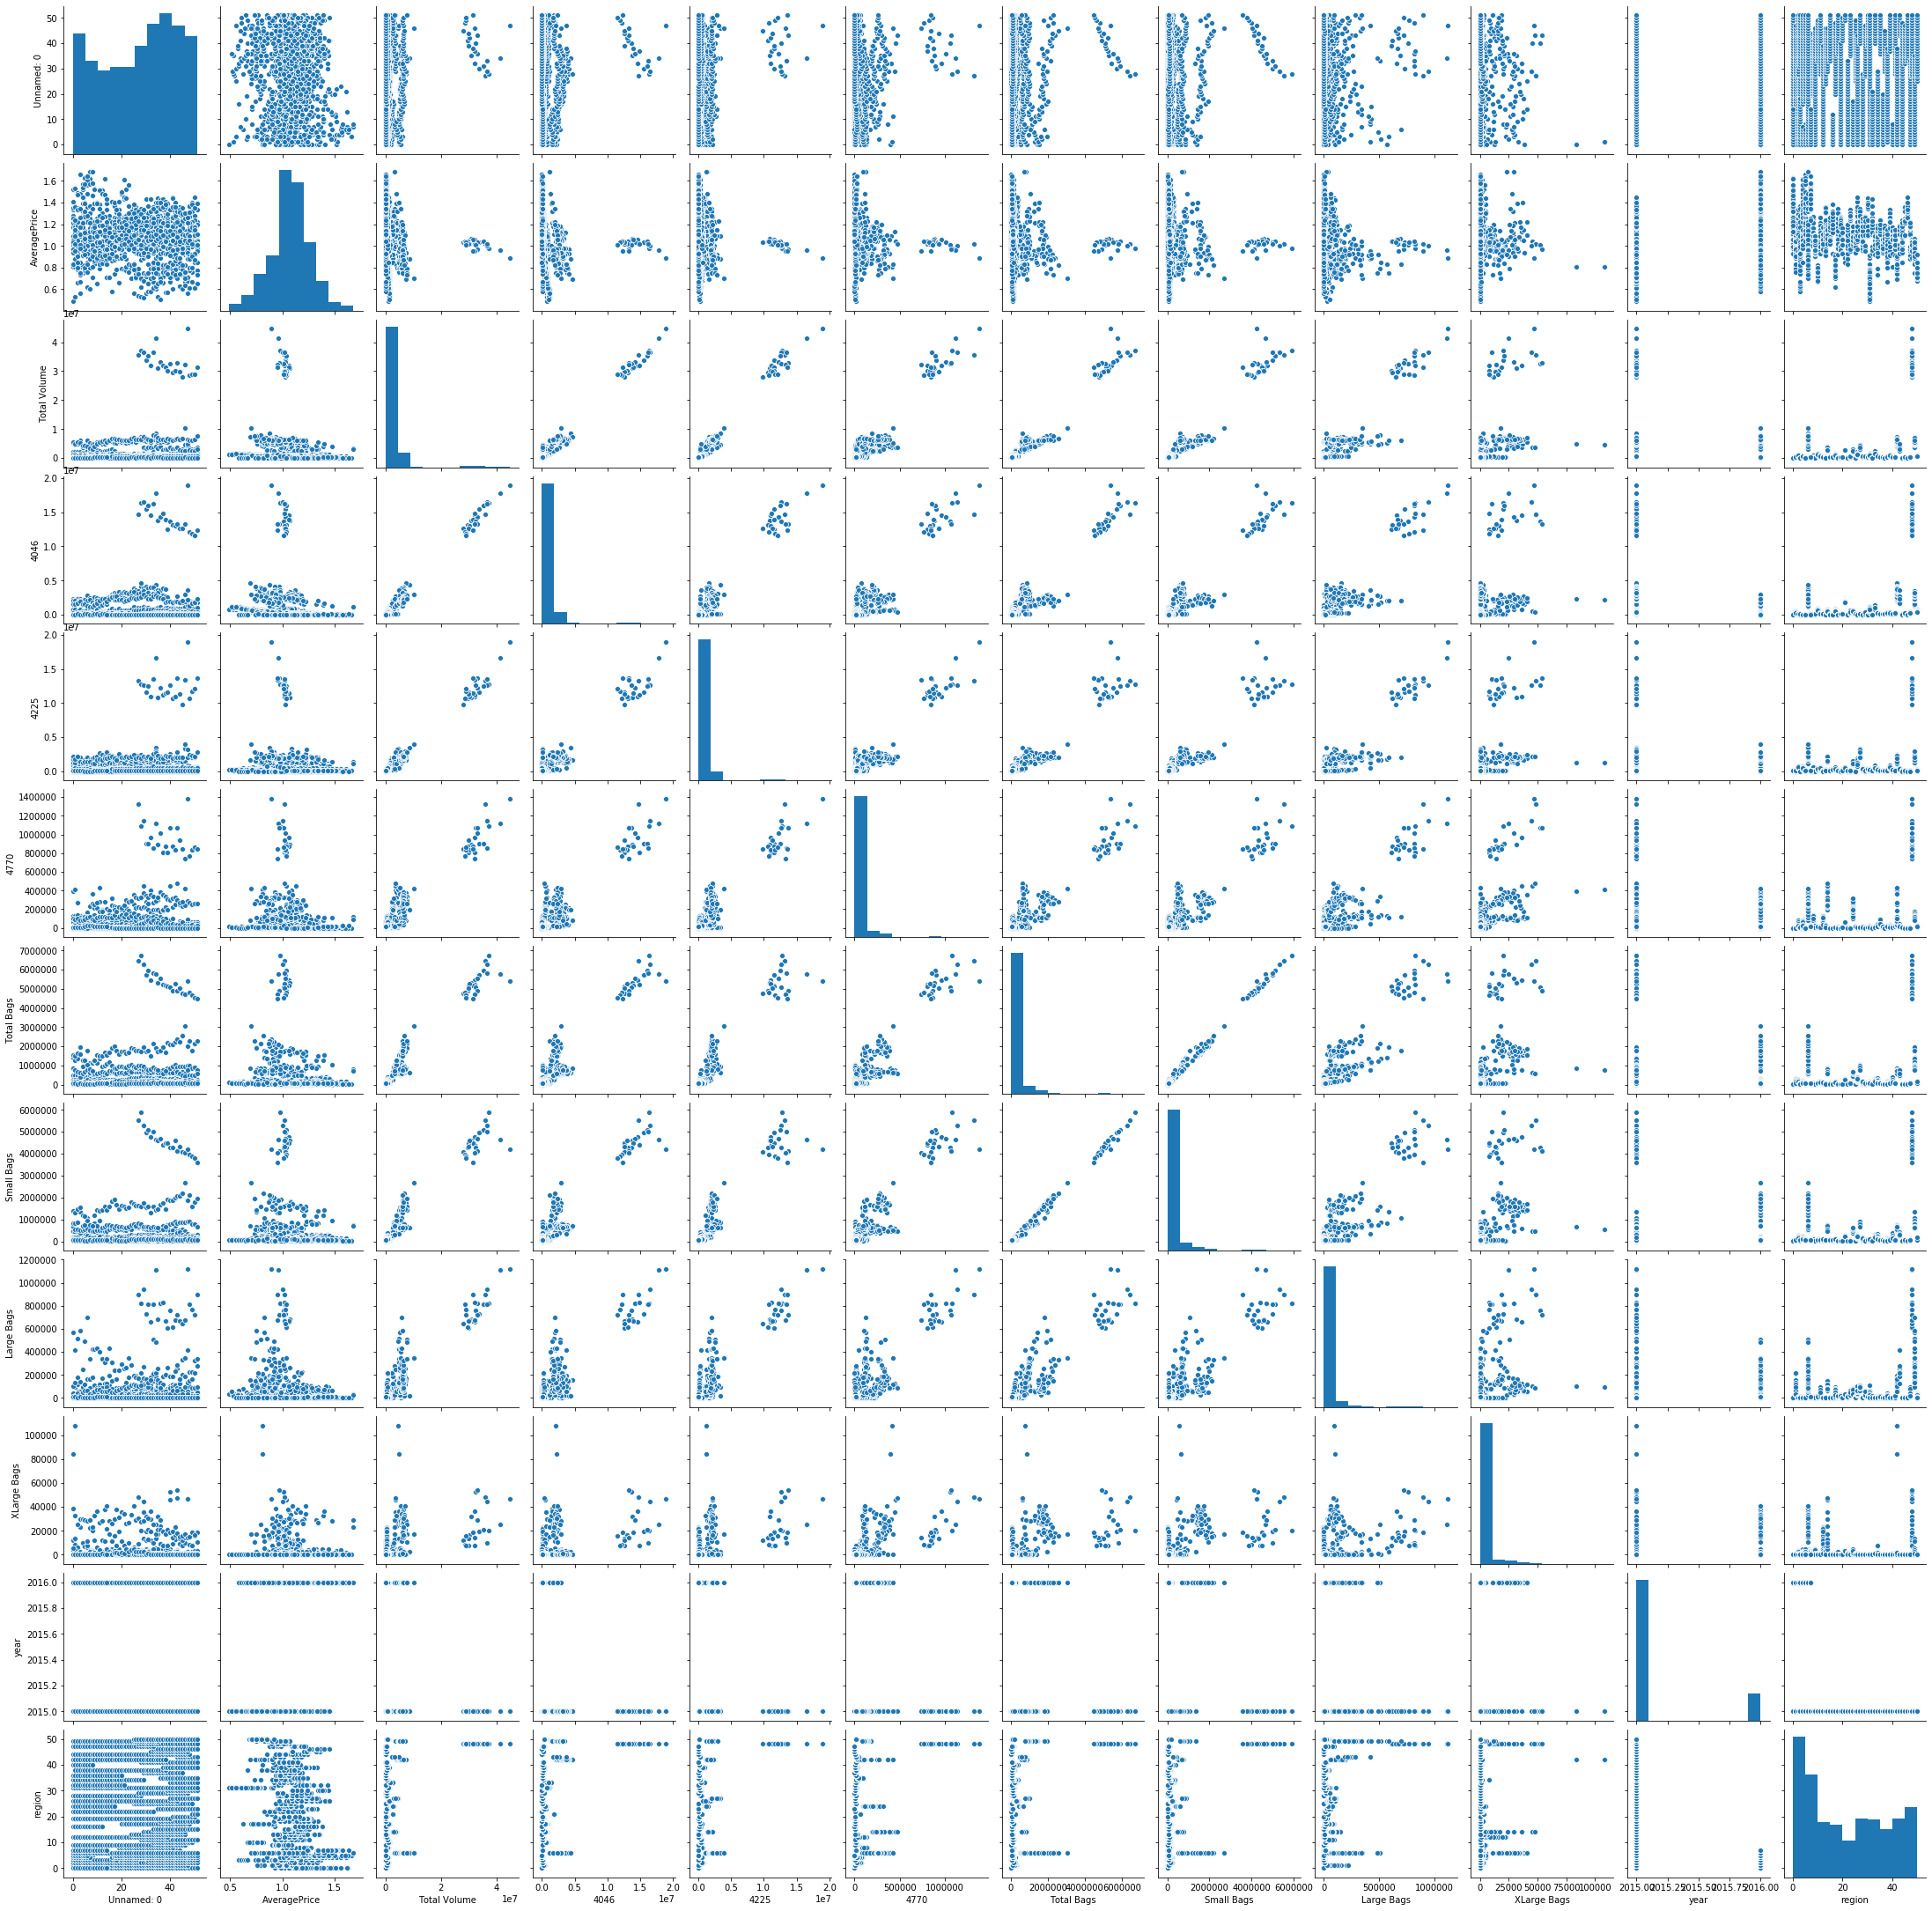

In [12]:
sns.pairplot(data)

### The columns Total Volume, 4046, 4225, 4770,	Total Bags,	Small Bags,	Large Bags,	XLarge Bags have standard deviations which are highier by order of magnitude compared to their means. But the nature of this variable indicated they are all non-negative. This tells us that there are high skewness present in those data. A possibility of outliers is also strong. 

In [13]:
data.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

### The distribution functions of the columns in the diagonal of the pairplot diagram tells that 4770, large bags and extra large bags are still skewed.

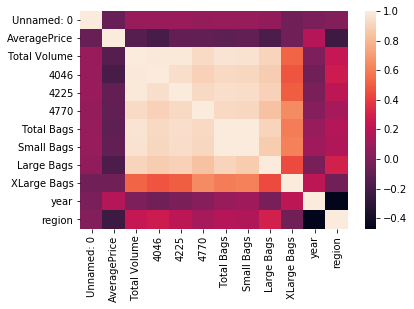

In [15]:
sns.heatmap(data.corr())

In [16]:
data['4046_r']=data['4046']/data['Total Volume']
data['4225_r']=data['4225']/data['Total Volume']
data['4770_r']=data['4770']/data['Total Volume']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

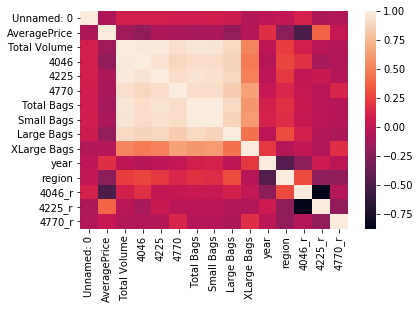

In [17]:
sns.heatmap(data.corr())

In [18]:
data['Small_Bags_r']=data['Small Bags']/data['Total Bags']
data['Large_Bags_r']=data['Large Bags']/data['Total Bags']
data['XLarge_Bags_r']=data['XLarge Bags']/data['Total Bags']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

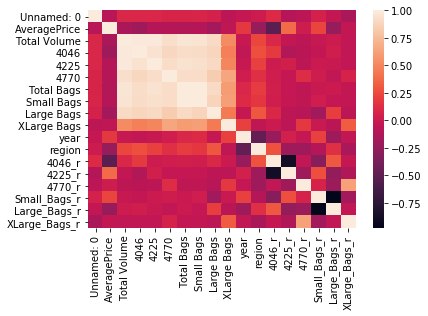

In [19]:
sns.heatmap(data.corr())

#### What I did in the last 4 lines and why I did that.


###### The avarge price and region had very small correlation with other columns. So in order to make useful features I used some intuitions. The cost of production, transportation and shelf life is different for every species of avacado. So I thought that may the ratio of produce of a particular species to the total produce might be of good significance, Similarly the transportation cost for various size of bags is different and hence might have an impact on the overall price; so I made three new features based on this hunch. 

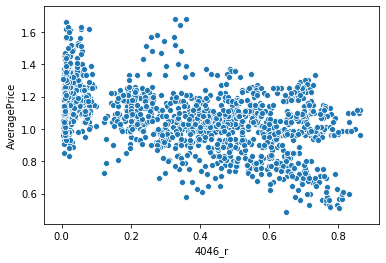

In [20]:
sns.scatterplot(data['4046_r'],data['AveragePrice'])
plt.show()

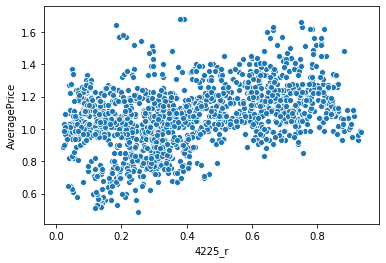

In [21]:
sns.scatterplot(data['4225_r'],data['AveragePrice'])
plt.show()

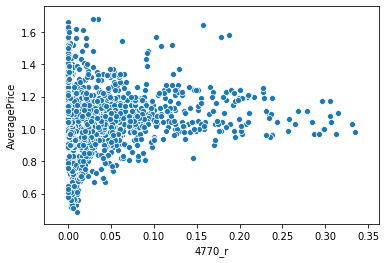

In [22]:
sns.scatterplot(data['4770_r'],data['AveragePrice'])
plt.show()

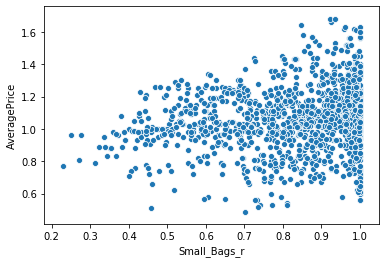

In [23]:
sns.scatterplot(data['Small_Bags_r'],data['AveragePrice'])
plt.show()

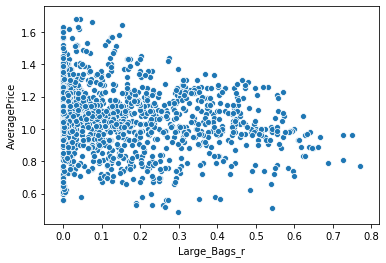

In [24]:
sns.scatterplot(data['Large_Bags_r'],data['AveragePrice'])
plt.show()

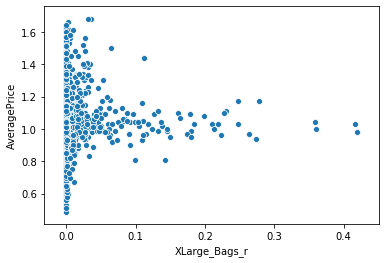

In [25]:
sns.scatterplot(data['XLarge_Bags_r'],data['AveragePrice'])
plt.show()

#### Just like the original features seen in the pairplots here also the relationship with the new features with our target variable suffers from heteroscedasticity. But the correlations have increased and for a few new features one can observe some trends in the scatter plots.

In [26]:
y1=data['AveragePrice']
y2=data['region']
x1=data.drop(['AveragePrice','Date','type'],axis=1)
x2=data.drop(['region','Date','type'],axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [52]:
X1_train,X1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20)
model_linear_regression=Pipeline([('Scalar',StandardScaler()),('Linear_Regression',LinearRegression())])
random_forest_regression=Pipeline([('Scalar',StandardScaler()),('Random_forest_Regression',RandomForestRegressor())])
model_pipelines=[model_linear_regression,random_forest_regression]
for pipe_line in model_pipelines:
    pipe_line.fit(X1_train,y1_train)
    print(r2_score(pipe_line.predict(X1_test),y1_test))

-1.1384424478365585
0.8276059020646775


#### Clearly lenear regression is underfitting by a great margin; that is kinf of expected as the data contained a large number of highly skewed columns and the skewness could not be removed due to presence of '0' values. Random forest regression technique gives an agreeable ammount of r2_score. For the linear regression algorithm we shall look into regularization methods to enhance the prediction level from this gross underfitting.

In [31]:
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

In [32]:
scale_price_x=StandardScaler()
scale_price_y=StandardScaler()
X1_scaled=scale_price_x.fit_transform(x1)
y1_scaled=scale(y1)

In [33]:
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(1,100)}
lasso=Lasso()
ridge=Ridge()
elast=ElasticNet()
lss_rgr=GridSearchCV(lasso,parameters)
lss_rgr.fit(X1_scaled,y1_scaled)
print(lss_rgr.best_params_)
rdg_rgr=GridSearchCV(ridge,parameters)
rdg_rgr.fit(X1_scaled,y1_scaled)
print(rdg_rgr.best_params_)
elast_rgr=GridSearchCV(elast,parameters)
elast_rgr.fit(X1_scaled,y1_scaled)
print(elast_rgr.best_params_)

{'alpha': 0.1, 'random_state': 1}
{'alpha': 1, 'random_state': 1}
{'alpha': 0.1, 'random_state': 1}


In [34]:
X1_scaled_train,X1_scaled_test,y1_scaled_train,y1_scaled_test=train_test_split(X1_scaled,y1_scaled,test_size=0.20)
best_lasso=Lasso(alpha=0.1,random_state=1)
best_lasso.fit(X1_scaled_train,y1_scaled_train)
print(r2_score(best_lasso.predict(X1_scaled_test),y1_scaled_test))

best_ridge=Ridge(alpha=1,random_state=1)
best_ridge.fit(X1_scaled_train,y1_scaled_train)
print(r2_score(best_ridge.predict(X1_scaled_test),y1_scaled_test))

best_elast=ElasticNet(alpha=0.1,random_state=1)
best_elast.fit(X1_scaled_train,y1_scaled_train)
print(r2_score(best_elast.predict(X1_scaled_test),y1_scaled_test))

-3.4666764167207367
-1.3362483365232345
-2.6985817254955227


#### This gives a clear indication that the heteroscedasticity is playing as a barrier to fit the model in a linear regressive manner even when regularization is applied.

In [35]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [36]:
joblib.dump(random_forest_regression,'avocado_price.pkl')

['avocado_price.pkl']

### Now lets try to model considering the region feature as target varible.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [53]:
X2_train,X2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.20)
model_logistic_regression=Pipeline([('Scalar',StandardScaler()),('Logistic_Regression',LogisticRegression())])
random_forest_classifier=Pipeline([('Scalar',StandardScaler()),('Random_forest_classifier',RandomForestClassifier())])
model_pipelines_2=[model_logistic_regression,random_forest_classifier]
for pipe_line_2 in model_pipelines:
    pipe_line_2.fit(X2_train,y2_train)
    print(pipe_line_2.score(X2_test,y2_test))
    #print(r2_score(pipe_line.predict(X1_test),y1_test))

0.44481611638041657
0.9444408304259282


#### Random forest classifier gives an acceptable  score. I focused only on score as the output varible has 51 categories so looking at a 51x51 confufsion matrix will be meaningless.

In [39]:
joblib.dump(random_forest_classifier,'avocado_region.pkl')

['avocado_region.pkl']